In [97]:
import lab9_lib
from random import choices, random
from copy import copy, deepcopy
import matplotlib.pyplot as plt


In [98]:
# the algorithm class

class GeneticAlgorithm:
    def __init__(self, num_populations, population_size, genome_length, crossover_rate, mutation_rate, fitness_function):
        self.population_size = population_size
        self.num_populations = num_populations
        self.genome_length = genome_length
        self.crossover_rate = crossover_rate
        self.mutation_rate = mutation_rate
        self.fitness_function = fitness_function
        self.population = self.initialize_population()
    


    def get_population_size(self):
        return len(self.population)

    def initialize_population(self): # num_pop= # islands
        all_populations = []

        for _ in range(self.num_populations):
            population = [choices([0, 1], k=self.genome_length) for _ in range(self.population_size)]
            all_populations.append(population)

        # Select the best individuals from each population
        best_individuals = []
        for population in all_populations:
            best_individuals.extend(sorted(population, key=self.fitness_function, reverse=True)[:5])

        return best_individuals

    def custom_crossover(self, ind1, ind2, k):
        # Create a child as a copy of the parent
        child = list(ind1)
    
        # Initialize the best fitness
        best_fitness = self.fitness_function(child)
    
        # Flag to track whether crossover resulted in a different child
        crossover_changed = False
    
        # Iterate from i to k and find the best fitness
        for i in range(k):
            step = k
    
            # Perform crossover on the child
            child[i::step] = ind2[i::step]
    
            # Evaluate the fitness of the child
            fitness_child = self.fitness_function(child)
    
            # Update the best fitness and child if the current child is better
            if fitness_child > best_fitness:
                best_fitness = fitness_child
                crossover_changed = True
            else:
                # If the current child is not better, revert the crossover changes
                child[i::step] = ind1[i::step]
    
        # If crossover didn't result in a different child, apply mutation
        if not crossover_changed:
            child = self.mutate(child, a)
    
        return child


    def mutate(self, individual, k):
        mutated_individual = deepcopy(individual)

        for i in range(0, len(mutated_individual), k):
            # Check if the entire segment should be mutated
            if random() < self.mutation_rate:
                # Randomly select a mutation value (0 or 1)
                mutation_value = 0 if random() < 0.5 else 1
                # Perform mutation on the entire segment
                mutated_individual[i:i+k] = [mutation_value] * k

        return mutated_individual

    def evaluate_population(self):
        return [self.fitness_function(individual) for individual in self.population]

    def run(self, generations):

        best_individual = None
        best_fitness = float('-inf')
        fitness_history = []


        for generation in range(generations):
            fitness_values = self.evaluate_population()
            elite_individuals = sorted(range(self.get_population_size()), key=lambda x: fitness_values[x], reverse=True)[:2]

            offspring_set = set()

            for i in range(len(elite_individuals)):
                #for j in range(len(elite_individuals)):
                for j in range(self.get_population_size()):
                    if i != j:
                        child = self.custom_crossover(self.population[elite_individuals[i]], self.population[j], a)
                        #child = self.custom_crossover(self.population[elite_individuals[i]], self.population[elite_individuals[j]], a)

                        
                        offspring_set.add(tuple(child))

            offspring = [list(child) for child in offspring_set]

            self.population += offspring

            fitness_values = self.evaluate_population()

            # Sort the population based on fitness and keep the top individuals
            self.population = sorted(self.population, key=lambda ind: fitness_values[self.population.index(ind)], reverse=True)[:self.population_size]



            current_best_index = max(range(self.get_population_size()), key=lambda x: fitness_values[x])
            current_best_fitness = fitness_values[current_best_index]

            if current_best_fitness > best_fitness:
                best_individual = self.population[current_best_index]
                best_fitness = current_best_fitness

            #print(f"Generation {generation + 1}: Best Fitness = {best_fitness}")
            fitness_history.append((best_fitness, fitness.calls))

        self.plot_fitness_history(fitness_history)
        return best_individual, best_fitness

    def plot_fitness_history(self, fitness_history):
        generations = range(1, len(fitness_history) + 1)
        best_fitness_values, fitness_calls = zip(*fitness_history)

        plt.plot(generations, best_fitness_values, label='Best Fitness', linewidth=2)

        # Plot individual vertical lines for each marker
        for marker in [20, 40, 60, 80, 100]:
            plt.axvline(x=marker, color='gray', linestyle='--',alpha=0.5, label=f'{fitness_calls[marker-1]} calls')

        # Plot individual horizontal lines for each fitness value at the markers
        for marker in ([20, 40, 60, 80, 100]):

            # Display fitness value on the y-axis at the marker
            plt.text(marker, best_fitness_values[marker-1], f'{best_fitness_values[marker-1]:.2f}', ha='right', va='bottom', color='red')

        plt.grid(True, linestyle='--', alpha=0.7)
        plt.title('Fitness Changes Across Generations')
        plt.xlabel('Generation')
        plt.ylabel('Fitness')
        plt.legend()
        plt.show()



#----------------------------------------------------------------------------------------------------------------#

Problem instance: 1


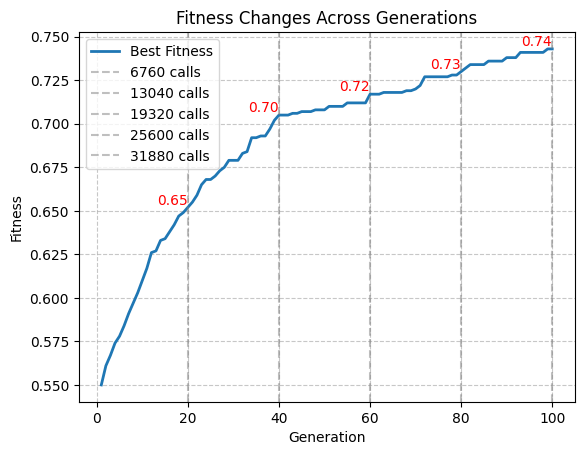


Best Individual: [1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 

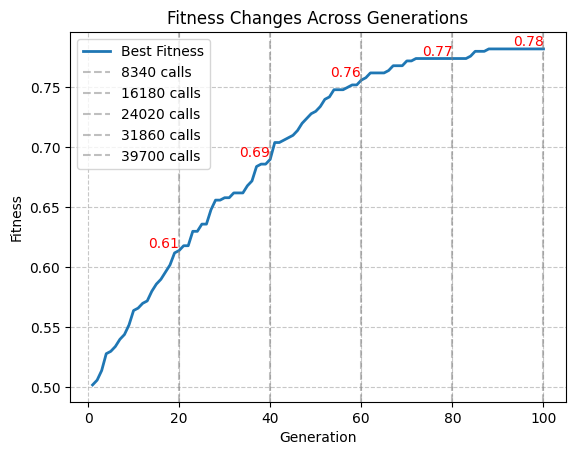


Best Individual: [1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 

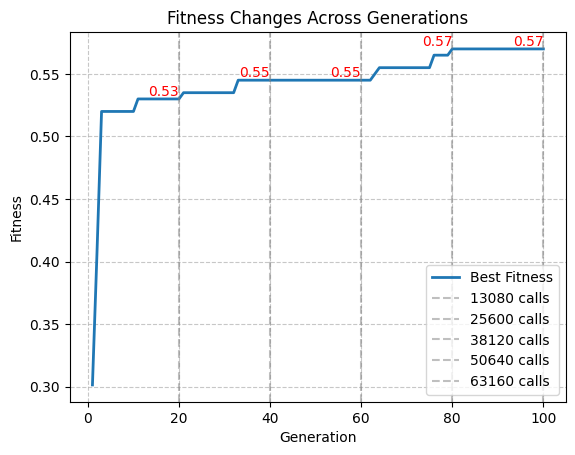


Best Individual: [0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 

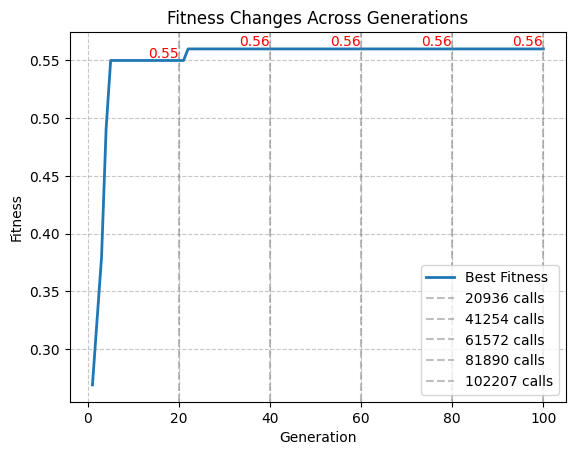


Best Individual: [1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [99]:
# Create and run the genetic algorithm with custom crossover and mutation

a = [1,2,5,10]


for a in a:
    print("\n#----------------------------------------------------------------------------------------------------------------#")
    print(f"\nProblem instance: {a}")

    num_populations = 10

    population_size = 40
    genome_length = 1000

    crossover_rate = 0.95
    mutation_rate = 0.05
    # Create the fitness function
    fitness = lab9_lib.make_problem(a)

    ga = GeneticAlgorithm(
        num_populations=num_populations,
        population_size=population_size,
        genome_length=genome_length,
        crossover_rate=crossover_rate,
        mutation_rate=mutation_rate,
        fitness_function=fitness
    )

    best_individual, best_fitness = ga.run(generations=100)

    print(f"\nBest Individual: {best_individual}")
    print(f"Best Fitness: {best_fitness}")
    print("Total Fitness Calls:", fitness.calls)